In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data=pd.read_csv("50_Startups.csv")   #Loading data
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.columns        #Columns present in dataset

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
X=data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y=data['Profit']

In [5]:
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (50, 4)
Shape of y (50,)


# Label Encoder

In [6]:
encoder=LabelEncoder()
X["State"]=encoder.fit_transform(X["State"])


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


# Hot Encoder

In [8]:
ohe=OneHotEncoder(categorical_features=[-1])
X=ohe.fit_transform(X).toarray()
#Split categorical feature into different columns 

/usr/local/lib64/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
X=X[:,1:]

In [10]:
X.shape

(50, 5)

# Splitting dataset and training model

In [19]:
model=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

In [20]:
X_train.shape

(41, 5)

In [21]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
y_pred=model.predict(X_test)

In [23]:
model.coef_

array([ 1.29789376e+03,  7.04270368e+02,  8.19875500e-01, -6.86362659e-02,
        2.16793270e-02])

In [24]:
model.intercept_

54655.67238496712

# Checking Outcome

In [25]:
metrics.mean_absolute_error(y_pred,y_test)

6947.0853996862825

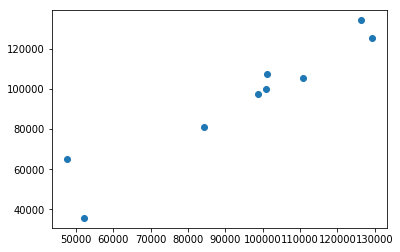

In [27]:
plt.scatter(y_pred,y_test)

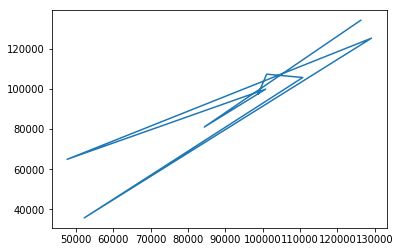

In [28]:
plt.plot(y_pred,y_test)